In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 30]
# df

### Run CMR-IA

In [3]:
s_mat = np.load("../Data/simu3_smat.npy")

In [4]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.3,
    beta_rec = 0.4,
    beta_rec_post = 0.17,
    gamma_fc = 0.1,
    s_fc = 0.5,
    c_thresh = 0.65,
    c_thresh_ass = 0.667,
    d_ass = 0.5,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
)
params

{'beta_enc': 0.3,
 'beta_rec': 0.4,
 'beta_rec_new': 0.5,
 'beta_rec_post': 0.17,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.5,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.65,
 'c_thresh_ass': 0.667,
 'd_ass': 0.5,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5}

In [5]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [6]:
df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
df_simu

CMR Time: 338.04546642303467


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,1,365,97,309,-1,0.0,992.257385,0.165237
1,0,2,260,204,74,-1,0.0,1791.690552,0.441374
2,0,3,238,353,135,-1,0.0,2271.817139,0.552318
3,0,4,375,126,274,-1,0.0,2517.418701,0.600287
4,0,5,227,366,365,97,0.0,2720.861084,0.636602
...,...,...,...,...,...,...,...,...,...
159995,999,156,201,365,389,-1,1.0,2534.002930,0.696644
159996,999,157,316,342,356,361,0.0,2721.034912,0.663368
159997,999,158,270,41,319,-1,0.0,2710.387451,0.634800
159998,999,159,52,275,208,349,0.0,2784.939697,0.647480


In [7]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,1,365,97,309,-1,0.0,992.257385,0.165237,155,0,-1
1,0,2,260,204,74,-1,0.0,1791.690552,0.441374,106,0,-1
2,0,3,238,353,135,-1,0.0,2271.817139,0.552318,154,0,-1
3,0,4,375,126,274,-1,0.0,2517.418701,0.600287,71,0,-1
4,0,5,227,366,365,97,0.0,2720.861084,0.636602,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
159995,999,156,201,365,389,-1,1.0,2534.002930,0.696644,154,2,1
159996,999,157,316,342,356,361,0.0,2721.034912,0.663368,151,6,2
159997,999,158,270,41,319,-1,0.0,2710.387451,0.634800,142,16,0
159998,999,159,52,275,208,349,0.0,2784.939697,0.647480,143,16,3


In [8]:
df_simu.groupby(['type','lag']).csim.mean()

type  lag
-1    0      0.594630
 0    2      0.624199
      4      0.624673
      6      0.624524
      8      0.624638
      16     0.624730
 1    2      0.676467
      4      0.664233
      6      0.661944
      8      0.661184
      16     0.657002
 2    2      0.681849
      4      0.675620
      6      0.674652
      8      0.674411
      16     0.671791
 3    2      0.667406
      4      0.663473
      6      0.662257
      8      0.662981
      16     0.660864
Name: csim, dtype: float64

### PLOT

In [9]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,-1,0,0.080127,0.919873
1,0,2,0.030004,0.969996
2,0,4,0.033232,0.966768
3,0,6,0.030341,0.969659
4,0,8,0.030455,0.969545
5,0,16,0.032137,0.967863
6,1,2,0.963671,0.036329
7,1,4,0.820655,0.179345
8,1,6,0.755257,0.244743
9,1,8,0.737636,0.262364


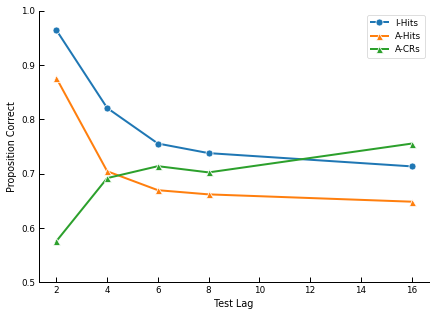

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 1], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 7, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 2], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 7, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 3], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 7, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proposition Correct')
plt.savefig('fig/simu3_hr.pdf')
plt.show()

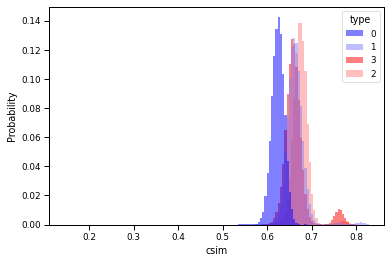

In [11]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = [0,1,3,2], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [12]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 1, 'yes_rate'].astype(float))
df_dprime['I_z_far'] = np.mean(sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 0, 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 2, 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 3, 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.794978,-1.863248,3.658226,1.152506,-0.191262,1.343768
1,4,0.917865,-1.863248,2.781113,0.536648,-0.500587,1.037234
2,6,0.691127,-1.863248,2.554375,0.438380,-0.563969,1.002349
3,8,0.636073,-1.863248,2.499321,0.417211,-0.530650,0.947861
4,16,0.562952,-1.863248,2.426200,0.380724,-0.690749,1.071472


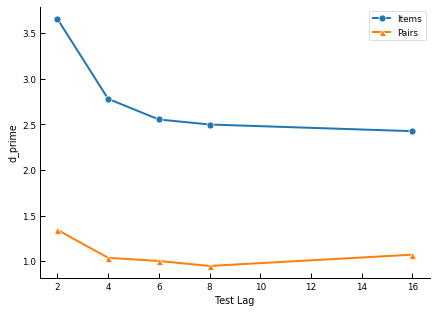

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 7, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 7, label='Pairs')
plt.ylabel('d_prime')
plt.xlabel('Test Lag')
plt.savefig('fig/simu3_dprime.pdf')
plt.show()